# <span style="color:navy">STAT 107 - Fall 2020 Final Project</span>
**By:** Olivia Luca
<span style="color:darkgrey">_______________________________________________________________________________________________________________________________</span>

## Loading Data
<span style="color:lightgrey">_______________________________________________________________________________________________________________________________</span>

We first import different libraries, and then we load the `flights.csv` dataset.

In [125]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

In [126]:
# Storing the dataset in a variable called 'flights'
flights = pd.read_csv('flights.csv')
flights

C:\Users\olivi\AppData\Local\Continuum\miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


## Analysis
<span style="color:lightgrey">_______________________________________________________________________________________________________________________________</span>


### <mark>Section 1: Hypothesis Test 1</mark>

`american` = American Airlines (AA) flights in December from O'Hare International Airport (Chicago) to Los Angeles International Aiport and the delay between scheduled arrival time and actual arrival time 

`united` = United Airlines (UA) flights in December from O'Hare International Airport (Chicago) to Los Angeles International Aiport and the delay between scheduled arrival time and actual arrival time 

In [127]:
# Filtering out only the values we are interested in and dropping empty values

american = flights.loc[(flights['MONTH'] == 12) & (flights['ORIGIN_AIRPORT'] == 'ORD') & (flights['DESTINATION_AIRPORT'] == 'LAX') &
           (flights['AIRLINE'] == 'AA'), 'ARRIVAL_DELAY'].dropna()
united = flights.loc[(flights['MONTH'] == 12) & (flights['ORIGIN_AIRPORT'] == 'ORD') & (flights['DESTINATION_AIRPORT'] == 'LAX') &
           (flights['AIRLINE'] == 'UA'), 'ARRIVAL_DELAY'].dropna()

**Below we check to see if the test assumptions are satisfied.**

One of these 2 conditions must be satisfied in order to use a Z-test to compare 2 population means:
- 𝑛<sub>1</sub> and 𝑛<sub>2</sub> are large (≥ 30)

- Population 1 and population 2 are approximately normal

In [128]:
# Testing the first condition: n1 (american) and n2 (united) are >= 30

# n1 (american) is >= 30
american_count = american.count()

if (american.count() >= 30):
    print('AA: n = ' + str(american_count) + ' 🗸')
    
# n2 (united) is >= 30
united_count = united.count()

if (united.count() >= 30):
    print('UA: n = ' + str(united_count) + ' 🗸')
    
# AA = American Airlines
# UA = United Airlines

AA: n = 280 🗸
UA: n = 302 🗸


**Boxplot**

Since the first condition is satisfied we know that it is ok to perform the test and we do not need to test the second condition, so we can move on to plotting a boxplot of the two samples.


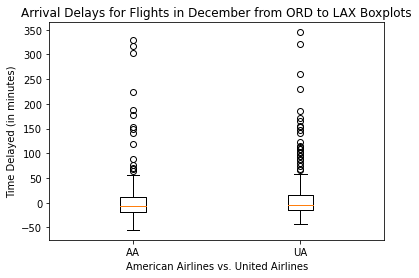

In [129]:
# Plotting boxplot of the two sample arrival delays on flights in December from ORD to LAX on American Airlines flights and on United Airlines flights
plt.boxplot([american,united])
plt.xlabel("American Airlines vs. United Airlines")
plt.ylabel("Time Delayed (in minutes)")

# AA = American Airlines
# UA = United Airlines

plt.xticks([1,2],["AA","UA"])
plt.title("Arrival Delays for Flights in December from ORD to LAX Boxplots")
plt.show()

**Hypothesis Test 1**

Null Hypothesis: 
**<span style="color:darkred">H<sub>0</sub></span>**: $\mu$<sub>1</sub> - $\mu$<sub>2</sub> = 0    
Alternate Hypothesis:
**<span style="color:darkred">H<sub>a</sub></span>**: $\mu$<sub>1</sub> - $\mu$<sub>2</sub> $\neq$ 0


$\mu$<sub>1</sub> = American Airlines population mean for arrival delays in December flights from ORD to LAX    
$\mu$<sub>2</sub> = United Airlines population mean for arrival delays in December flights from ORD to LAX

Significance level, $\alpha$ = 0.05

Moreover, I am using a two-sided alternate hypothesis because I am looking to test for whether there is a difference between $\mu$<sub>1</sub> and $\mu$<sub>2</sub>, not necessarily whether $\mu$<sub>1</sub> is greater or less than $\mu$<sub>2</sub>.

-----------------------------------------------------------------------------

Now we will calculate the sample means and standard deviations for American Airlines and United Airlines arrival delays in December flights from ORD to LAX which we will need in our 2-sample z-test.

In [130]:
# American Airlines sample mean
american_mean = american.mean()

# American Airlines sample standard deviation
american_std = american.std()

# United Airlines sample mean 
united_mean = united.mean()

# United Airlines sample standard deviation
united_std = united.std()

Now we will input what we calculated above into the 2-sample z-test:

In [131]:
# 2-sample z-test

Z1 = (american_mean - united_mean)/((american_std**2)/american_count + (united_std**2)/united_count)**.5
print('The z statistic is ' + str(Z1) + '.')

The z statistic is -1.3926811323141544.


In order to find the correct p-value, we must multiply our norm.cdf result by 2 to account for our two-sided alternate hypothesis.

In [132]:
# p-value
p_value1 = norm.cdf(Z1) * 2
print('The p-value is ' + str(p_value1) + '.')

The p-value is 0.16371623660393797.


**Hypothesis 1 Conclusion:**

Here we establish the conclusion based off of whether we reject the null hypothesis or fail to reject it. If the p-value is greater than $\alpha$, we fail to reject it, however if it is less than or equal to $\alpha$, we reject the null hypothesis.

In [133]:
# Determining whether to reject the null hypothesis or fail to reject it
alpha = .05

if (p_value1 > alpha):
    print('We fail to reject the null hypothesis and conclude that there is no evidence supporting for a difference in the population mean arrival delay on flights in December from O’Hare International Airport (Chicago) ORD to Los Angeles International Airport LAX between American Airlines and United Airlines.')
else:
    print('We reject the null hypothesis and conclude that there is evidence supporting a difference in the population mean arrival delay on flights in December from O’Hare International Airport (Chicago) ORD to Los Angeles International Airport LAX between American Airlines and United Airlines.')

We fail to reject the null hypothesis and conclude that there is no evidence supporting for a difference in the population mean arrival delay on flights in December from O’Hare International Airport (Chicago) ORD to Los Angeles International Airport LAX between American Airlines and United Airlines.


<span style="color:lightgrey">_______________________________________________________________________________________________________________________________</span>

### <mark>Section 2: Hypothesis Test 2</mark>


`aa` = American Airlines (AA) flights in December from O'Hare International Airport (Chicago) to Los Angeles International Aiport with delay times over an hour   
`ua` = United Airlines (UA) flights in December from O'Hare International Airport (Chicago) to Los Angeles International Aiport with delay times over an hour

First, we have to filter out the relevant values for the second hypothesis test from the `flights` dataset.

In [134]:
# Filtering out only the values we are interested in and dropping empty values

aa = american.loc[flights['ARRIVAL_DELAY'] > 60].dropna()
ua = united.loc[flights['ARRIVAL_DELAY'] > 60].dropna()

Next, we need to calculate the respective sample sizes and sample means to see if they satisfy all of our assumptions for our z-test to compare 2 population proportions:

- n<sub>1</sub> *  p̂<sub>1</sub> $\geq$ 10 **and** n<sub>1</sub> * (1 - p̂<sub>1</sub>) $\geq$ 10

- n<sub>2</sub> *  p̂<sub>2</sub> $\geq$ 10 **and** n<sub>2</sub> * (1 - p̂<sub>2</sub>) $\geq$ 10


In [136]:
# Sample successes
x1 = aa.count()
x2 = ua.count()

# Sample sizes
n1 = american_count
n2 = united_count

# P-hat values/sample proportions
p̂1 = x1/n1
p̂2 = x2/n2


Making sure we satisfy all four conditions so that it is ok to use a z-test to compare 2 population proportions:

In [137]:
# Testing condition 1
if ((n1 * p̂1) >= 10):
    print("Condition 1 passed: product is greater than or equal to 10")
else:
    print("Condition 1 failed: product is less than 10")

Condition 1 passed: product is greater than or equal to 10


In [138]:
# Testing Condition 2
if ((n1*(1 - p̂1)) >= 10):
    print("Condition 2 passed: result is greater than or equal to 10")
else:
    print("Condition 2 failed: result is less 10")

Condition 2 passed: result is greater than or equal to 10


In [139]:
# Testing Condition 3
if ((n2 * p̂2) >= 10):
    print("Condition 3 passed: product is greater than or equal to 10")
else:
    print("Condition 3 failed: product is less than 10")

Condition 3 passed: product is greater than or equal to 10


In [140]:
# Testing Condition 4
if ((n2*(1 - p̂2)) >= 10):
    print("Condition 4 passed: result is greater than or equal to 10")
else:
    print("Condition 4 failed: result is less than")

Condition 4 passed: result is greater than or equal to 10


Since all the conditions passed, we can continue to calculate the P-hat, test statistic, and also state the hypotheses.

--------------------------------------------------------

**Hypothesis Test 2**

Null Hypothesis: 
**<span style="color:darkred">H<sub>0</sub></span>**: p<sub>1</sub> = p<sub>2</sub>    
Alternate Hypothesis:
**<span style="color:darkred">H<sub>a</sub></span>**: p<sub>1</sub> $\neq$ p<sub>2</sub> 


p<sub>1</sub> = American Airlines population proportion for December flights from ORD to LAX delaying over an hour    
p<sub>2</sub> = United Airlines population proportion for December flights from ORD to LAX delaying over an hour

Significance level, $\alpha$ = 0.05

Additionally, I am using a two-sided alternate hypothesis because I would like to test for whether there is a difference between p<sub>1</sub> and p<sub>2</sub>, not necessarily whether p<sub>1</sub> is greater or less than p<sub>2</sub>.

In [141]:
# Calculating P-hat
p̂ = (x1 + x2)/(n1 + n2)
p̂

0.070446735395189

Now we will input what was calculated above into the z-test to compare 2 population proportions:

In [142]:
# Calculating z-test to compare 2 population proportions
Z2 = (p̂1 - p̂2)/((p̂*(1-p̂))*((1/n1)+(1/n2)))**.5
print('The z statistic is ' + str(Z2) + '.')

The z statistic is -1.5318672735156422.


In order to find the correct p-value, we must multiply our norm.cdf result by 2 to account for our two-sided alternate hypothesis.

In [143]:
# p-value
p_value2 = norm.cdf(Z2) * 2
p_value2
print('The p-value is ' + str(p_value2) + '.')

The p-value is 0.12555519084273978.


**Hypothesis 2 Conclusion:**

Below we establish our conclusion based upon whether we reject the null hypothesis or fail to reject it. If the p-value is greater than $\alpha$, we fail to reject it, however if it is less than or equal to $\alpha$, we reject the null hypothesis.

In [144]:
# Determining whether to reject the null hypothesis or fail to reject it

if (p_value2 > alpha):
    print('We fail to reject the null hypothesis and conclude that there is no evidence supporting a difference in the population proportion for flights in December from ORD to LAX delaying over an hour between American Airlines and United Airlines.')
else:
    print('We reject the null hypothesis and conclude that there is evidence supporting a difference in the population proportion for flights in December from ORD to LAX delaying over an hour between American Airlines and United Airlines.')

We fail to reject the null hypothesis and conclude that there is no evidence supporting a difference in the population proportion for flights in December from ORD to LAX delaying over an hour between American Airlines and United Airlines.


<span style="color:lightgrey">_______________________________________________________________________________________________________________________________</span>

### <mark>Section 3: Hypothesis Test 3</mark>

**Question of Interest**: We are interested in the average arrival delay on flights in December from O’Hare International Airport (Chicago) `ORD` to Los Angeles International Airport `LAX`. In particularly, we want to compare the average arrival delay between Frontier Airlines `F9` and Spirit Air Lines `NK`

In [145]:
# Filtering for the two populations we are interested in (Frontier and Spirit) and dropping empty values


frontier = flights.loc[(flights['MONTH'] == 12) & (flights['ORIGIN_AIRPORT'] == 'ORD') & (flights['DESTINATION_AIRPORT'] == 'LAX') &
           (flights['AIRLINE'] == 'F9'), 'ARRIVAL_DELAY'].dropna()

spirit = flights.loc[(flights['MONTH'] == 12) & (flights['ORIGIN_AIRPORT'] == 'ORD') & (flights['DESTINATION_AIRPORT'] == 'LAX') &
           (flights['AIRLINE'] == 'NK'), 'ARRIVAL_DELAY'].dropna()

**Below we check to see if the test assumptions are satisfied.**

One of these 2 conditions must be satisfied in order to use a Z-test to compare 2 population means:
- 𝑛<sub>1</sub> and 𝑛<sub>2</sub> are large (≥ 30)

- Population 1 and population 2 are approximately normal

In [146]:
# Testing the first condition: n1 (frontier) and n2 (spirit) are >= 30

# n1 (frontier) is >= 30
frontier_count = frontier.count()

if (frontier.count() >= 30):
    print('F9: n = ' + str(frontier_count) + ' 🗸')
    
# n2 (spirit) is >= 30
spirit_count = spirit.count()

if (spirit.count() >= 30):
    print('NK: n = ' + str(spirit_count) + ' 🗸')
    
# F9 = Frontier Airlines
# NK = Spirit Airlines

F9: n = 31 🗸
NK: n = 60 🗸


Since the first condition is satisfied we know that it is ok to perform the test and we do not need to test the second condition, so we can move on to stating our hypotheses.

--------------------------------------------------------

**Hypothesis Test 3**

Null Hypothesis: 
**<span style="color:darkred">H<sub>0</sub></span>**: $\mu$<sub>1</sub> - $\mu$<sub>2</sub> = 0    
Alternate Hypothesis:
**<span style="color:darkred">H<sub>a</sub></span>**: $\mu$<sub>1</sub> - $\mu$<sub>2</sub> $\neq$ 0


$\mu$<sub>1</sub> = Frontier Airlines population mean for arrival delays in December flights from ORD to LAX   
$\mu$<sub>2</sub> = Spirit Airlines population mean for arrival delays in December flights from ORD to LAX

Significance level, $\alpha$ = 0.05

Furthermore, I chose a two-sided alternate hypothesis because I would like to simply test for whether a difference exists between $\mu$<sub>1</sub> and $\mu$<sub>2</sub>, not necessarily whether $\mu$<sub>1</sub> is greater or less than $\mu$<sub>2</sub>.

Now we will calculate the sample means and standard deviations for Frontier Airlines and Spirit Airlines arrival delays in December flights from ORD to LAX which we will need in our 2-sample z-test.

In [147]:
# Frontier Airlines sample mean
frontier_mean = frontier.mean()

# Frontier Airlines sample standard deviation
frontier_std = frontier.std()

# Spirit Airlines sample mean 
spirit_mean = spirit.mean()

# Spirit Airlines sample standard deviation
spirit_std = spirit.std()

Now we will input what we calculated above into the 2-sample z-test:

In [148]:
# 2-sample z-test

Z3 = (frontier_mean - spirit_mean)/((frontier_std**2)/frontier_count + (spirit_std**2)/spirit_count)**.5
print('The z statistic is ' + str(Z3) + '.')

The z statistic is -0.04508859166691971.


In order to find the correct p-value, we must multiply our norm.cdf result by 2 to account for our two-sided alternate hypothesis.

In [149]:
# p-value
p_value3 = norm.cdf(Z3) * 2
print('The p-value is ' + str(p_value3) + '.')

The p-value is 0.964036694706597.


**Hypothesis 3 Conclusion:**

Here we come up with the conclusion based upon whether we reject the null hypothesis or fail to reject it. If the p-value is greater than $\alpha$, we fail to reject it, however if it is less than or equal to $\alpha$, we reject the null hypothesis.

In [150]:
# Determining whether to reject the null hypothesis or fail to reject it

if (p_value3 > alpha):
    print('We fail to reject the null hypothesis and conclude that there is no evidence supporting for a difference in the population mean arrival delay on flights in December from O’Hare International Airport (Chicago) ORD to Los Angeles International Airport LAX between Frontier Airlines and Spirit Airlines.')
else:
    print('We reject the null hypothesis and conclude that there is evidence supporting a difference in the population mean arrival delay on flights in December from O’Hare International Airport (Chicago) ORD to Los Angeles International Airport LAX between Frontier Airlines and Spirit Airlines.')

We fail to reject the null hypothesis and conclude that there is no evidence supporting for a difference in the population mean arrival delay on flights in December from O’Hare International Airport (Chicago) ORD to Los Angeles International Airport LAX between Frontier Airlines and Spirit Airlines.


<span style="color:lightgrey">_______________________________________________________________________________________________________________________________</span>

### <mark>Section 4: Multiple Comparisons</mark>

**Boneferroni's Correction**

Now we will calculate the significance level for each hypothesis test at a family-wise error rate of $\alpha$*

In [151]:
# alpha* = alpha/m, where m = 3 because of our 3 hypothesis tests
m = 3
alpha_star = alpha/m

# family-wise error = ma
print("The probability of making type 1 error(s) in our hypothesis tests is actually " + str(alpha * m * 100) + "%, not " + str(alpha * 100) + "%!")

The probability of making type 1 error(s) in our hypothesis tests is actually 15.000000000000002%, not 5.0%!


**Hypothesis 1 Test with Boneferroni's Correction**:

We will now test the Hypothesis 1 significance using the new significance level $\alpha$* = 0.016666666666666666.

In [161]:
# Hypothesis 1 significance with the new significance level, alpha*

if (p_value1 > alpha_star):
    print("Conclusion for Hypothesis 1 Test with Boneferroni's Correction: We still fail to reject the null hypothesis and conclude that there is no evidence supporting for a difference in the population mean arrival delay on flights in December from O’Hare International Airport (Chicago) ORD to Los Angeles International Airport LAX between American Airlines and United Airlines.")
else:
    print("Conclusion for Hypothesis 1 Test with Boneferroni's Correction: We reject the null hypothesis and conclude that there is evidence supporting a difference in the population mean arrival delay on flights in December from O’Hare International Airport (Chicago) ORD to Los Angeles International Airport LAX between American Airlines and United Airlines.")

Conclusion for Hypothesis 1 Test with Boneferroni's Correction: We still fail to reject the null hypothesis and conclude that there is no evidence supporting for a difference in the population mean arrival delay on flights in December from O’Hare International Airport (Chicago) ORD to Los Angeles International Airport LAX between American Airlines and United Airlines.


**Hypothesis 2 Test with Boneferroni's Correction**:

We will now test the Hypothesis 2 significance using the new significance level $\alpha$* = 0.016666666666666666.

In [162]:
# Hypothesis 2 significance with the new significance level, alpha*

if (p_value2 > alpha_star):
    print("Conclusion for Hypothesis 2 Test with Boneferroni's Correction: We still fail to reject the null hypothesis and conclude that there is no evidence supporting a difference in the population proportion for flights in December from ORD to LAX delaying over an hour between American Airlines and United Airlines.")
else:
    print("Conclusion for Hypothesis 2 Test with Boneferroni's CorrectionWe reject the null hypothesis and conclude that there is evidence supporting a difference in the population proportion for flights in December from ORD to LAX delaying over an hour between American Airlines and United Airlines.")

Conclusion for Hypothesis 2 Test with Boneferroni's Correction: We still fail to reject the null hypothesis and conclude that there is no evidence supporting a difference in the population proportion for flights in December from ORD to LAX delaying over an hour between American Airlines and United Airlines.


**Hypothesis 3 Test with Boneferroni's Correction**:

We will now test the Hypothesis 3 significance using the new significance level $\alpha$* = 0.016666666666666666.

In [163]:
# Hypothesis 3 significance with the new significance level, alpha*

if (p_value3 > alpha_star):
    print("Conclusion for Hypothesis 3 Test with Boneferroni's Correction: We still fail to reject the null hypothesis and conclude that there is no evidence supporting for a difference in the population mean arrival delay on flights in December from O’Hare International Airport (Chicago) ORD to Los Angeles International Airport LAX between Frontier Airlines and Spirit Airlines.")
else:
    print("Conclusion for Hypothesis 3 Test with Boneferroni's Correction: We reject the null hypothesis and conclude that there is evidence supporting a difference in the population mean arrival delay on flights in December from O’Hare International Airport (Chicago) ORD to Los Angeles International Airport LAX between Frontier Airlines and Spirit Airlines.")

Conclusion for Hypothesis 3 Test with Boneferroni's Correction: We still fail to reject the null hypothesis and conclude that there is no evidence supporting for a difference in the population mean arrival delay on flights in December from O’Hare International Airport (Chicago) ORD to Los Angeles International Airport LAX between Frontier Airlines and Spirit Airlines.


None of the previous hypotheses conclusions change while using the corrected significance level, $\alpha$*, so we still fail to reject all 3 of the previous null hypotheses.